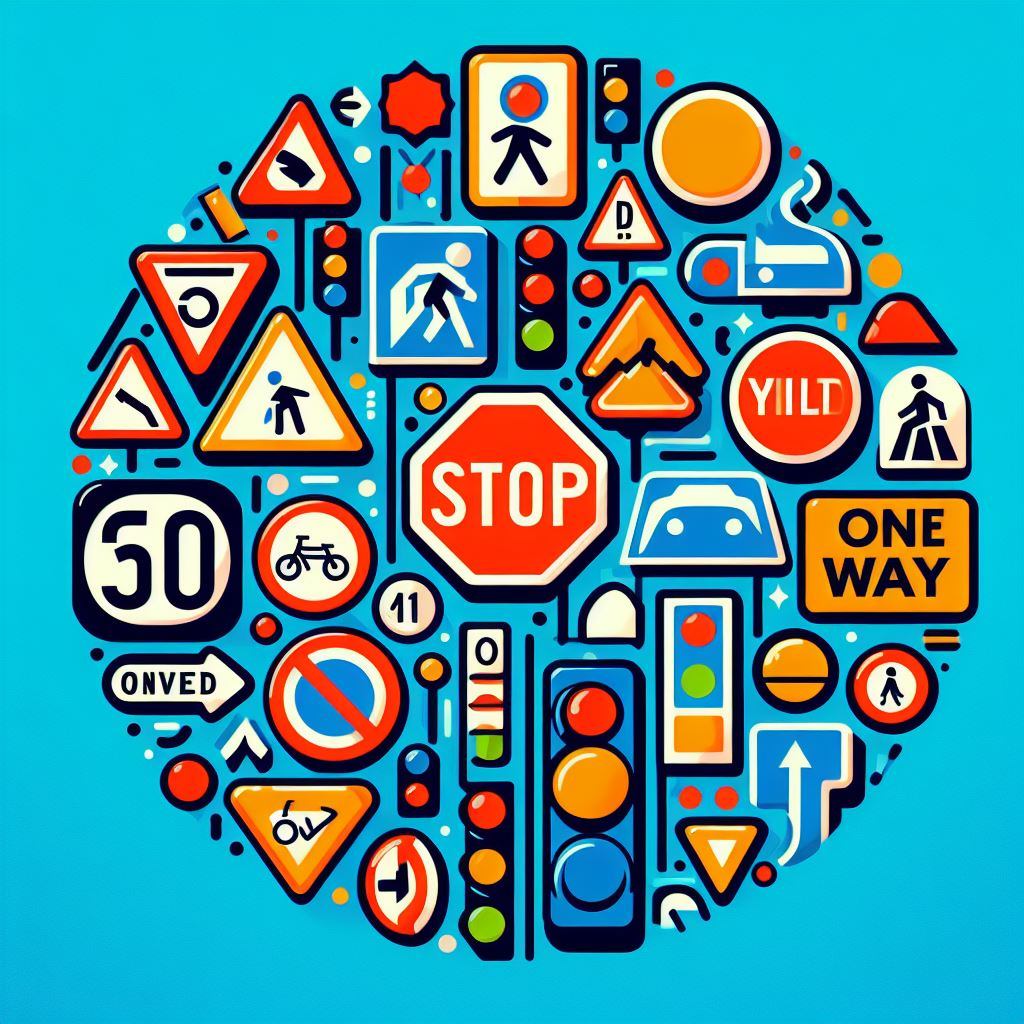

<font color = "red"><b>Problem Statement: </b>

<b>Accurately recognizing traffic signs is crucial for autonomous driving and advanced driver assistance systems (ADAS) However, traditional computer vision methods struggle with accuracy and real-time performance due to lighting, weather, and occlusions. Developing robust models for automated traffic sign recognition is essential for road safety and advancing autonomous vehicles



<b>Road Sign Classes

0. Speed limit (20km/h)
1. Speed limit (30km/h)
2. Speed limit (50km/h)
3. Speed limit (60km/h)
4. Speed limit (70km/h)
5. Speed limit (80km/h)
6. End of speed limit (80km/h)
7. Speed limit (100km/h)
8. Speed limit (120km/h)
9. No passing
10. No passing veh over 3.5 tons
11. Right-of-way at intersection
12. Priority road
13. Yield
14. Stop
15. No vehicles
16. Veh > 3.5 tons prohibited
17. No entry
18. General caution
19. Dangerous curve left
20. Dangerous curve right
21. Double curve
22. Bumpy road
23. Slippery road
24. Road narrows on the right
25. Road work
26. Traffic signals
27. Pedestrians
28. Children crossing
29. Bicycles crossing
30. Beware of ice/snow
31. Wild animals crossing
32. End speed + passing limits
33. Turn right ahead
34. Turn left ahead
35. Ahead only
36. Go straight or right
37. Go straight or left
38. Keep right
39. Keep left
40. Roundabout mandatory
41. End of no passing
42. End no passing veh > 3.5 tons

<font color ="blue"><b>Importing the necessary libraries</b></font>

In [ ]:
import keras  # Importing the Keras library for building neural networks
import numpy as np  # Importing NumPy library for numerical operations
import pandas as pd  # Importing Pandas library for data manipulation and analysis
import matplotlib.pyplot as plt  # Importing Matplotlib library for data visualization
import cv2  # Importing OpenCV library for image processing
import tensorflow as tf  # Importing TensorFlow library for building and training deep learning models
from PIL import Image  # Importing the Python Imaging Library for image processing
from tensorflow.keras.preprocessing import image  # Importing image preprocessing utilities from Keras
import os  # Importing the os module for interacting with the operating system
from sklearn.model_selection import train_test_split  # Importing train_test_split function from scikit-learn for splitting data into training and testing sets
from tensorflow.keras.utils import to_categorical  # Importing to_categorical function from Keras utilities for one-hot encoding
from keras.models import Sequential, load_model  # Importing Sequential model and load_model function from Keras for building and loading neural network models
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Activation  # Importing layers from Keras for building the neural network architecture
import random  # Importing random module for generating random numbers and shuffling data
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img  # Importing ImageDataGenerator class and load_img function from Keras for image augmentation and loading images
import warnings  # Importing warnings module to handle warnings
warnings.filterwarnings("ignore")  # Suppressing warnings for cleaner output


<font color ="blue"><b> Importing the dataset

In [ ]:
from PIL import Image  # Importing the Python Imaging Library for image processing
cur_path = r'D:\gtsrb-german-traffic-sign'  # Setting the current path to the directory containing the German Traffic Sign Recognition Benchmark dataset

In [ ]:
data = []  # List to store image data
labels = []  # List to store corresponding labels
classes = 43  # Total number of classes or categories

# Loop through each class
for i in range(classes):
    # Construct the path to the directory containing images for the current class
    path = os.path.join(cur_path, 'train', str(i))

    # Get the list of image filenames in the current class directory
    images = os.listdir(path)

    # Loop through each image in the current class
    for a in images:
        try:
            # Open the image using PIL (Python Imaging Library)
            image = Image.open(path + '\\' + a)

            # Resize the image to a fixed size (30x30 pixels in this case)
            image = image.resize((30, 30))

            # Convert the image to a numpy array for easier manipulation
            image = np.array(image)

            # Append the image data and its corresponding label to the data list
            data.append([image, i])  # i represents the label for the current image

        except:
            # If there's an error loading the image, print an error message
            print("Error loading image")

<font color ="blue"><b>Checking number of images in the dataset</b></font>

In [ ]:
train_path = r"C:\Users\Anup Kolhe\Downloads\gtsrb-german-traffic-sign\Train"  # Setting the path to the directory containing training images
total_images = 0  # Variable to store the total number of images

# Loop through each class directory
for i in range(classes):
    # Construct the path to the directory containing images for the current class
    class_path = os.path.join(train_path, str(i))

    # Get the list of image filenames in the current class directory
    images = os.listdir(class_path)

    # Increment the total_images count by the number of images in the current class directory
    total_images += len(images)

print("Total number of images in the train folder:", total_images)  # Print the total number of images in the training folder


Total number of images in the train folder: 39209


In [ ]:
test_path = r"C:\Users\Anup Kolhe\Downloads\gtsrb-german-traffic-sign\Test"  # Setting the path to the directory containing test images
total_test_images = 0  # Variable to store the total number of test images

# Loop through each item in the test folder
for filename in os.listdir(test_path):
    # Check if the item is a regular file (not a directory)
    if os.path.isfile(os.path.join(test_path, filename)):
        # Increment the total_test_images count
        total_test_images += 1

print("Total number of images in the test folder:", total_test_images)  # Print the total number of images in the test folder


Total number of images in the test folder: 12632


In [ ]:
# Label Overview: A dictionary mapping class indices to their corresponding traffic sign labels

classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)',
            2:'Speed limit (50km/h)',
            3:'Speed limit (60km/h)',
            4:'Speed limit (70km/h)',
            5:'Speed limit (80km/h)',
            6:'End of speed limit (80km/h)',
            7:'Speed limit (100km/h)',
            8:'Speed limit (120km/h)',
            9:'No passing',
            10:'No passing veh over 3.5 tons',
            11:'Right-of-way at intersection',
            12:'Priority road',
            13:'Yield',
            14:'Stop',
            15:'No vehicles',
            16:'Veh > 3.5 tons prohibited',
            17:'No entry',
            18:'General caution',
            19:'Dangerous curve left',
            20:'Dangerous curve right',
            21:'Double curve',
            22:'Bumpy road',
            23:'Slippery road',
            24:'Road narrows on the right',
            25:'Road work',
            26:'Traffic signals',
            27:'Pedestrians',
            28:'Children crossing',
            29:'Bicycles crossing',
            30:'Beware of ice/snow',
            31:'Wild animals crossing',
            32:'End speed + passing limits',
            33:'Turn right ahead',
            34:'Turn left ahead',
            35:'Ahead only',
            36:'Go straight or right',
            37:'Go straight or left',
            38:'Keep right',
            39:'Keep left',
            40:'Roundabout mandatory',
            41:'End of no passing',
            42:'End no passing veh > 3.5 tons' }

<font color ="blue"><b>Visualizing the distribution of classes in the dataset</b></font>

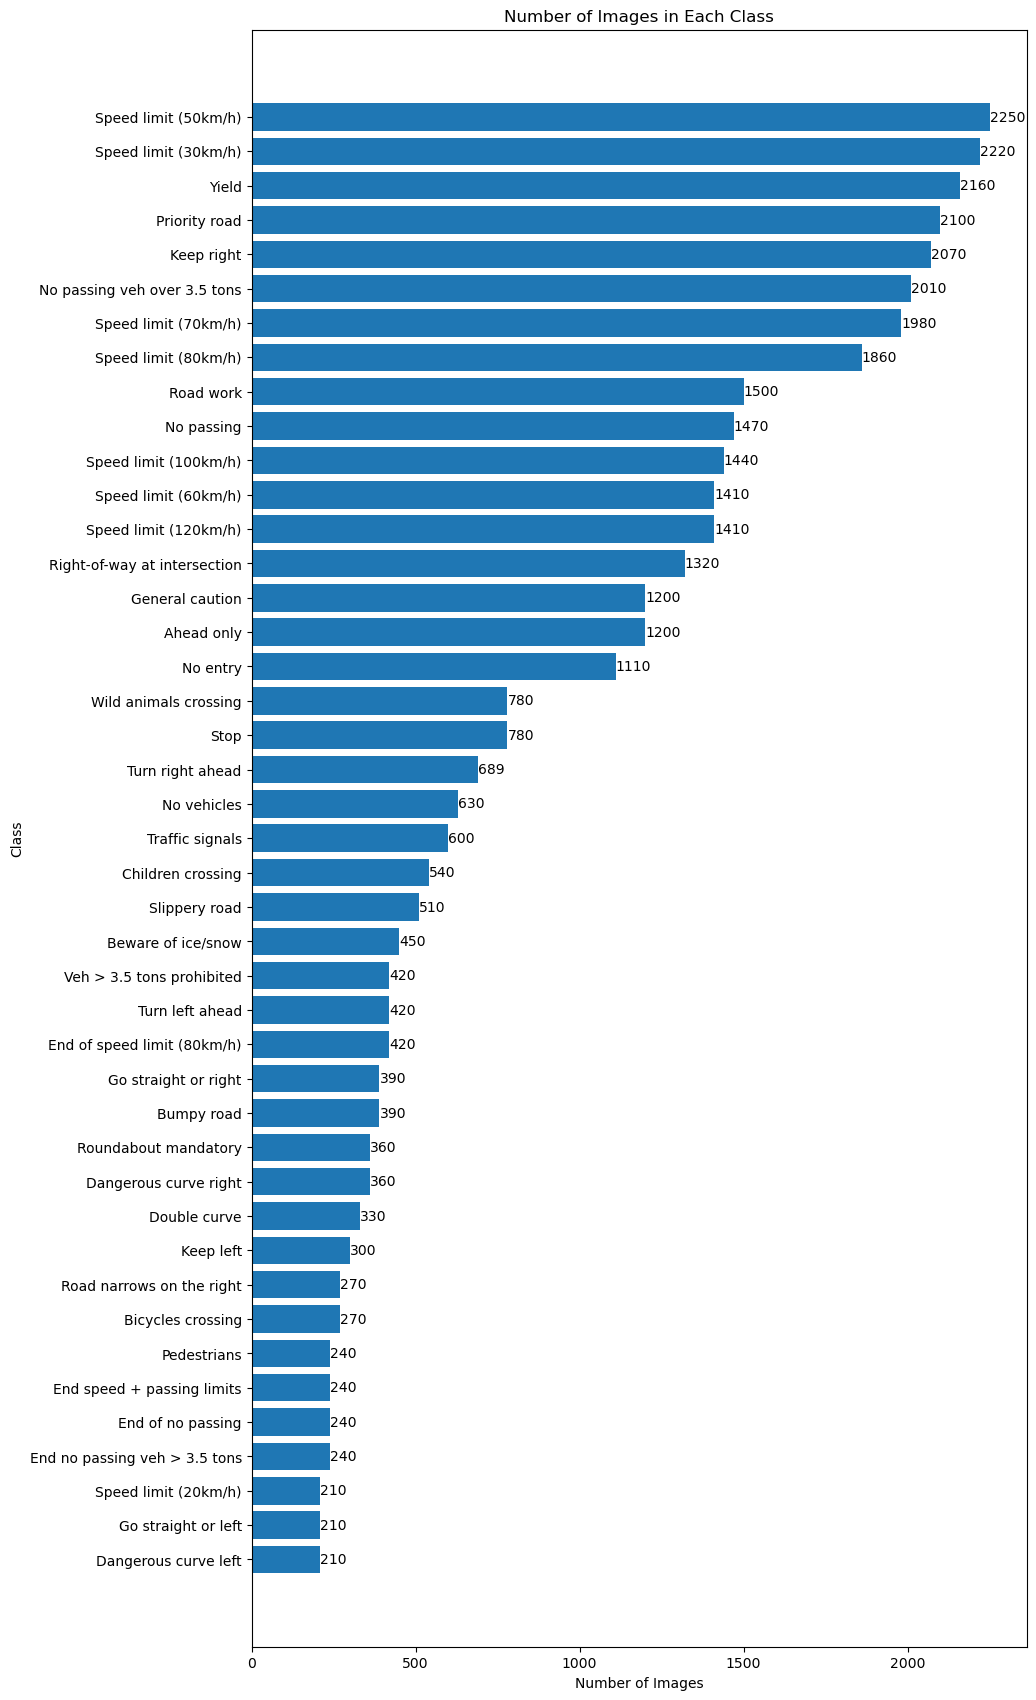

In [ ]:
train_path = r"C:\Users\Anup Kolhe\Downloads\gtsrb-german-traffic-sign\Train"  # Setting the path to the directory containing training images

folders = os.listdir(train_path)  # Get the list of directories (class folders) in the training path

train_number = []  # List to store the number of images in each class
class_num = []  # List to store the class labels

# Loop through each class folder
for folder in folders:
    # Get the list of image filenames in the current class folder
    train_files = os.listdir(train_path + '/' + folder)

    # Append the number of images in the current class folder to train_number list
    train_number.append(len(train_files))

    # Append the corresponding class label to class_num list
    class_num.append(classes[int(folder)])

# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [list(tuple) for tuple in tuples]

# Plotting the number of images in each class as a horizontal bar graph with counts
plt.figure(figsize=(10, 21))  # Adjust the figsize for better visualization
bars = plt.barh(class_num, train_number)  # Use barh for horizontal bar graph
plt.yticks(class_num, rotation='horizontal')  # Use yticks instead of xticks for horizontal orientation
plt.xlabel('Number of Images')
plt.ylabel('Class')
plt.title('Number of Images in Each Class')

# Annotate each bar with its count
for bar, count in zip(bars, train_number):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, str(count), ha='left', va='center')

plt.show()  # Show the plot

<font color ="blue"><b> Checking Sample Images

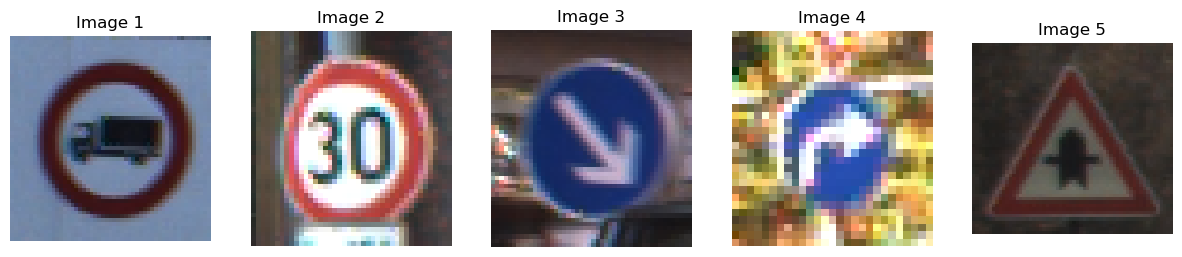

In [ ]:
test_path = r"C:\Users\Anup Kolhe\Downloads\gtsrb-german-traffic-sign\Test"  # Setting the path to the directory containing test images

# Get a list of filenames for some images in the test folder
image_filenames = os.listdir(test_path)[:5]  # Change 5 to the number of images you want to view

# Plot the images
plt.figure(figsize=(15, 5))  # Adjust the figsize as needed

for i, filename in enumerate(image_filenames, 1):
    # Construct the full path to the image file
    image_path = os.path.join(test_path, filename)

    # Open and display the image using PIL (Python Imaging Library)
    image = Image.open(image_path)

    plt.subplot(1, len(image_filenames), i)
    plt.imshow(image)
    plt.title(f"Image {i}")
    plt.axis('off')

plt.show()  # Show the plot

In [ ]:
random.shuffle(data) # Shuffles the data in-place to avoid biasing the model

In [ ]:
x = []  # List to store image data and  features (images)
y = []  # List to store labels

# Iterate over each element in the 'data' list, which contains image data and labels
for features, label in data:
    x.append(features)  # Append the image data (features) to the 'x' list
    y.append(label)     # Append the label to the 'y' list


In [ ]:
#Converting lists into numpy arrays for easy manipulation
x = np.array(x)
y = np.array(y)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42) # Split the data into training and validation sets

In [ ]:
X_train = X_train/255.0 # Normalize the pixel values
X_val = X_val/255.0 # Normalize the pixel values

In [ ]:
print("Shape of train images is:", X_train.shape) # Print the shape of the training images
print("Shape of labels is:", y_train.shape) # Print the shape of the labels

Shape of train images is: (31367, 30, 30, 3)
Shape of labels is: (31367,)


In [ ]:
# Flatten the input data
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)

<font color ="green"><b>Artifical Neural Network</b></font>

In [ ]:
# Define the ANN model
def create_ann_model(input_shape):
    """
    Function to create a simple Artificial Neural Network (ANN) model.

    Parameters:
    input_shape (tuple): The shape of the input data.

    Returns:
    keras.models.Sequential: The constructed ANN model.
    """
    model = Sequential()  # Creating a Sequential model
    model.add(Dense(512, input_shape=input_shape, activation='relu'))  # Adding a fully connected layer with 512 units and ReLU activation
    model.add(Dropout(0.4))  # Adding a dropout layer with a dropout rate of 0.4
    model.add(Dense(256, activation='relu'))  # Adding another fully connected layer with 256 units and ReLU activation
    model.add(Dropout(0.4))  # Adding another dropout layer with a dropout rate of 0.4
    model.add(Dense(128, activation='relu'))  # Adding another fully connected layer with 128 units and ReLU activation
    model.add(Dense(43, activation='softmax'))  # Adding the output layer with 43 units (one for each class) and softmax activation

    return model  # Returning the constructed ANN model

# Create the ANN model
ann_model = create_ann_model(input_shape=(30*30*3,))  # Calling the function to create the ANN model

# Compile the model
ann_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  # Compiling the model with categorical crossentropy loss and Adam optimizer

# Train the model
history = ann_model.fit(X_train_flat, y_train, epochs=20, batch_size=64, validation_data=(X_val_flat, y_val))  # Training the model with training data and validating with validation data

# Evaluate the model on the training set
train_loss, train_accuracy = ann_model.evaluate(X_train_flat, y_train, verbose=0)  # Evaluating the model on the training set
print("Training Accuracy:", train_accuracy)  # Printing the training accuracy

# Evaluate the model on the validation set
val_loss, val_accuracy = ann_model.evaluate(X_val_flat, y_val, verbose=0)  # Evaluating the model on the validation set
print("Validation Accuracy:", val_accuracy)  # Printing the validation accuracy


Epoch 1/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.1237 - loss: 3.3381 - val_accuracy: 0.4036 - val_loss: 1.9682
Epoch 2/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.3231 - loss: 2.2229 - val_accuracy: 0.4968 - val_loss: 1.5410
Epoch 3/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.4196 - loss: 1.8265 - val_accuracy: 0.5621 - val_loss: 1.3774
Epoch 4/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.4595 - loss: 1.6726 - val_accuracy: 0.6265 - val_loss: 1.2404
Epoch 5/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.4969 - loss: 1.5473 - val_accuracy: 0.6704 - val_loss: 1.0570
Epoch 6/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.5363 - loss: 1.4475 - val_accuracy: 0.6131 - val_loss: 1.1833
Epoch 7/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.5522 - loss: 1.3996 - val_accuracy: 0.7131 - val_loss: 0.9293
Epoch 8/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.5724 - loss: 1.3330 - 

In [ ]:
# Evaluate the model on the training set
train_loss, train_accuracy = ann_model.evaluate(X_train_flat, y_train, verbose=0)
print("Training Loss:", f"{train_loss:.4f}")
print("Training Accuracy:", f"{train_accuracy * 100:.2f}%")

# Evaluate the model on the validation set
val_loss, val_accuracy = ann_model.evaluate(X_val_flat, y_val, verbose=0)
print("Validation Loss:", f"{val_loss:.4f}")
print("Validation Accuracy:", f"{val_accuracy * 100:.2f}%")


Training Loss: 0.5402
Training Accuracy: 83.60%
Validation Loss: 0.5848
Validation Accuracy: 82.01%


<font color ="green"><b>Convolutional Neural Network</b></font>

In [ ]:
from keras.callbacks import EarlyStopping  # Importing EarlyStopping callback from Keras
from keras.regularizers import l2  # Importing L2 regularization from Keras

# Building the model
model = Sequential()  # Creating a Sequential model
model.add(Conv2D(32, (3, 3), input_shape=(30, 30, 3), padding='same'))  # Adding a 2D convolutional layer with 32 filters, kernel size (3,3), and 'same' padding
model.add(Activation('relu'))  # Adding ReLU activation function
model.add(MaxPooling2D(pool_size=(2, 2)))  # Adding a max pooling layer with pool size (2,2)

model.add(Conv2D(64, (3, 3), padding='same'))  # Adding another 2D convolutional layer with 64 filters, kernel size (3,3), and 'same' padding
model.add(Activation('relu'))  # Adding ReLU activation function
model.add(MaxPooling2D(pool_size=(2, 2)))  # Adding another max pooling layer with pool size (2,2)

model.add(Conv2D(128, (3, 3), padding='same'))  # Adding another 2D convolutional layer with 128 filters, kernel size (3,3), and 'same' padding
model.add(Activation('relu'))  # Adding ReLU activation function
model.add(MaxPooling2D(pool_size=(2, 2)))  # Adding another max pooling layer with pool size (2,2)

model.add(Flatten())  # Flatten the 3D feature maps to 1D feature vectors
model.add(Dense(128, kernel_regularizer=l2(0.01)))  # Adding a fully connected layer with 128 units and L2 regularization (0.01)
model.add(Activation('relu'))  # Adding ReLU activation function
model.add(Dropout(0.6))  # Adding a dropout layer with dropout rate of 0.6

model.add(Dense(43))  # Adding the output layer with 43 units (one for each class)
model.add(Activation('softmax'))  # Adding softmax activation function

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  # Compiling the model with categorical crossentropy loss, Adam optimizer, and accuracy metric

aug = ImageDataGenerator(  # Creating an ImageDataGenerator for data augmentation
    rotation_range=10,  # Randomly rotate images by 10 degrees
    zoom_range=0.15,  # Randomly zoom images by 15%
    width_shift_range=0.1,  # Randomly shift images horizontally by 10%
    height_shift_range=0.1,  # Randomly shift images vertically by 10%
    shear_range=0.15,  # Shear intensity (angle in degrees)
    horizontal_flip=False,  # Randomly flip images horizontally
    vertical_flip=False,  # Randomly flip images vertically
    fill_mode="nearest")  # Fill mode for filling in newly created pixels

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)  # Define early stopping to prevent overfitting

history = model.fit(aug.flow(X_train, y_train, batch_size=32), epochs=10, validation_data=(X_val, y_val), callbacks=[early_stopping])  # Training the model with data augmentation and early stopping

# Printing the scores
train_scores = model.evaluate(X_train, y_train, verbose=0)  # Evaluate the model on the training set
val_scores = model.evaluate(X_val, y_val, verbose=0)  # Evaluate the model on the validation set
print("Training Accuracy: %.2f%%" % (train_scores[1]*100))  # Printing the training accuracy
print("Training Loss: %.4f" % train_scores[0])  # Printing the training loss
print("Validation Accuracy: %.2f%%" % (val_scores[1]*100))  # Printing the validation accuracy
print("Validation Loss: %.4f" % val_scores[0])  # Printing the validation loss


Epoch 1/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 51s 48ms/step - accuracy: 0.1516 - loss: 3.4961 - val_accuracy: 0.4718 - val_loss: 1.7439
Epoch 2/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 46s 47ms/step - accuracy: 0.4432 - loss: 1.8685 - val_accuracy: 0.6955 - val_loss: 1.1154
Epoch 3/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 46s 46ms/step - accuracy: 0.5840 - loss: 1.4129 - val_accuracy: 0.8150 - val_loss: 0.7853
Epoch 4/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 47s 47ms/step - accuracy: 0.6848 - loss: 1.1215 - val_accuracy: 0.8694 - val_loss: 0.6207
Epoch 5/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 46s 46ms/step - accuracy: 0.7482 - loss: 0.9475 - val_accuracy: 0.9167 - val_loss: 0.4622
Epoch 6/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 47s 47ms/step - accuracy: 0.7940 - loss: 0.8222 - val_accuracy: 0.9345 - val_loss: 0.4120
Epoch 7/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 46s 47ms/step - accuracy: 0.8236 - loss: 0.7117 - val_accuracy: 0.9535 - val_loss: 0.3587
Epoch 8/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 46s 46ms/step - accuracy: 0.8488 - loss: 0.6436 - 

In [ ]:
model.save('my_model2.keras') # Saving the model

<font color ="blue"><b>Predicting on Test *Set*</b></font>

In [ ]:
from keras.models import load_model

# Load the model
model = load_model('my_model2.keras')

In [ ]:
import numpy as np  # Importing NumPy library for numerical operations
from keras.preprocessing import image  # Importing image preprocessing utilities from Keras
import matplotlib.pyplot as plt  # Importing Matplotlib library for data visualization

def predict_traffic_sign(path, model):
    """
    Function to predict the traffic sign class from an image.

    Parameters:
    path (str): The path to the image file.
    model (keras.engine.sequential.Sequential): The trained model for traffic sign classification.

    Returns:
    None
    """
    # Load the image
    img = image.load_img(path, target_size=(30, 30))

    # Display the image
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Preprocess the image
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])

    # Predict the label for the image
    classes = np.argmax(model.predict(images, batch_size=32), axis=-1)

    # Define the traffic sign classes
    traffic_signs = {
        0:'Speed limit (20km/h)',
        1:'Speed limit (30km/h)',
        2:'Speed limit (50km/h)',
        3:'Speed limit (60km/h)',
        4:'Speed limit (70km/h)',
        5:'Speed limit (80km/h)',
        6:'End of speed limit (80km/h)',
        7:'Speed limit (100km/h)',
        8:'Speed limit (120km/h)',
        9:'No passing',
        10:'No passing veh over 3.5 tons',
        11:'Right-of-way at intersection',
        12:'Priority road',
        13:'Yield',
        14:'Stop',
        15:'No vehicles',
        16:'Veh > 3.5 tons prohibited',
        17:'No entry',
        18:'General caution',
        19:'Dangerous curve left',
        20:'Dangerous curve right',
        21:'Double curve',
        22:'Bumpy road',
        23:'Slippery road',
        24:'Road narrows on the right',
        25:'Road work',
        26:'Traffic signals',
        27:'Pedestrians',
        28:'Children crossing',
        29:'Bicycles crossing',
        30:'Beware of ice/snow',
        31:'Wild animals crossing',
        32:'End speed + passing limits',
        33:'Turn right ahead',
        34:'Turn left ahead',
        35:'Ahead only',
        36:'Go straight or right',
        37:'Go straight or left',
        38:'Keep right',
        39:'Keep left',
        40:'Roundabout mandatory',
        41:'End of no passing',
        42:'End no passing veh > 3.5 tons'
    }

    # Print the predicted traffic sign
    if classes[0] in traffic_signs:
        print(traffic_signs[classes[0]])
    else:
        print('Unknown traffic sign')


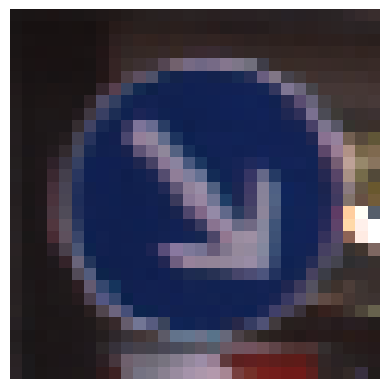

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Keep right


In [ ]:
predict_traffic_sign('C:/Users/Anup Kolhe/Downloads/gtsrb-german-traffic-sign/Test/00005.png', model)


<font color ="green"><b>Conclusions</b></font>

<b>The Convolutional Neural Network (CNN) exhibited superior performance over the Artificial Neural Network (ANN) in recognizing German traffic signs achieving an accuracy of 97.96%
on training and 97.86% on testing hence a prferred model for this project.</b>